### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [19]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [21]:
conditions = [
    (data['GPA'] < 2),
    (data['GPA'] >= 2) & (data['GPA'] < 3.5),
    (data['GPA'] >= 3.5)
]

values = ['Low', 'Medium', 'High']

data['Profile'] = np.select(conditions, values)

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

<Axes: title={'center': 'Students distribution of Profiles'}>

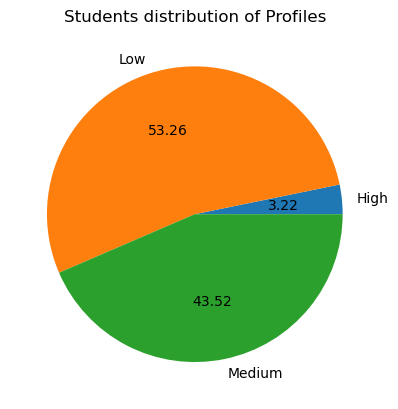

In [22]:
data.groupby('Profile').size().plot(kind='pie', title="Students distribution of Profiles", autopct='%.2f')

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [23]:
data['Profile'].replace(['Low', 'Medium', 'High'], [0, 1, 2], inplace=True)
data.head()

C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\1399912117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Profile'].replace(['Low', 'Medium', 'High'], [0, 1, 2], inplace=True)
C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\1399912117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [24]:
df = data.drop(columns=['StudentID'])
X = df.drop('Profile', axis=1)
y = df[['Profile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [26]:
model = Sequential([
    Dense(64, input_dim=14, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

c:\Users\eryke\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7304 - loss: 0.7074 - val_accuracy: 0.9321 - val_loss: 0.2408
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1927 - val_accuracy: 0.9478 - val_loss: 0.1705
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1493 - val_accuracy: 0.9556 - val_loss: 0.1258
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1095 - val_accuracy: 0.9556 - val_loss: 0.1092
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.0884 - val_accuracy: 0.9582 - val_loss: 0.1068
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0570 - val_accuracy: 0.9608 - val_loss: 0.0870
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0660 - val_accuracy: 0.9634 - val_loss: 0.0983
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0446 - val_accuracy: 0.

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

<Axes: title={'center': 'Model Loss over Epochs'}, xlabel='Epochs', ylabel='Loss'>

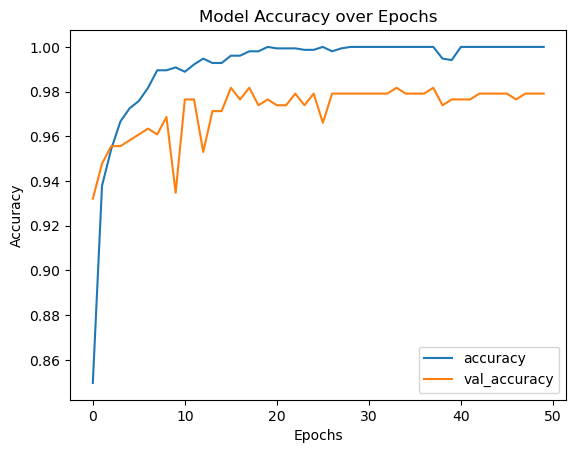

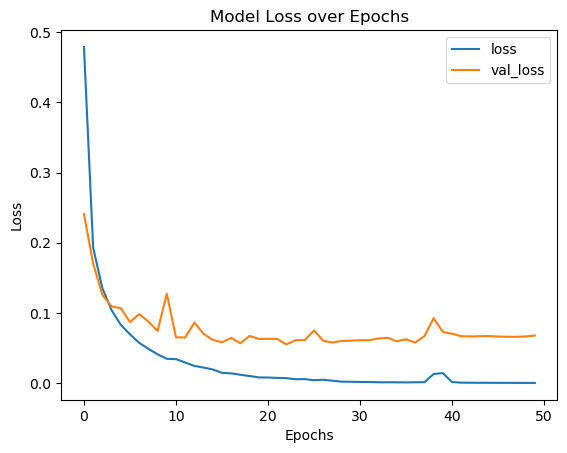

In [29]:
hist = pd.DataFrame(history.history)
hist.plot(y=['accuracy', 'val_accuracy'], xlabel='Epochs', ylabel='Accuracy', title='Model Accuracy over Epochs')
hist.plot(y=['loss', 'val_loss'], xlabel='Epochs', ylabel='Loss', title='Model Loss over Epochs')

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [30]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", acc)
# The loss function is low and with a very high accuracy which means the model has a good performance

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0913 
Loss: 0.1111825704574585
Accuracy: 0.9749478101730347


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [31]:
y_test_array = np.array(y_test)

predictions = model.predict(X_test)

for i in range(len(predictions)):
    print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 2, Actual Value: 2
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1


C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\2189262893.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")


In [32]:
labels = ["Low", "Medium", "High"]

for i in range(len(predictions)):
    print(f"Prediction: {labels[np.argmax(predictions[i])]}, Actual Value: {labels[int(y_test_array[i])]}")

Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: High, Actual Value: High
Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Low, Actual Value: Low
Prediction: Low, Actual Value: Low
Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Medium, Actual Value: Medium
Prediction: Low, Actual Value: Low
Prediction: Low, Actual Value: Low
Prediction: Low, Actual Value: Low
Prediction: Medium, Actual Value: Medium
Prediction: Low, Actual Value: Low
Prediction: Low, Actual Value: Low
Prediction

C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\1749382184.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {labels[np.argmax(predictions[i])]}, Actual Value: {labels[int(y_test_array[i])]}")


The model is accurate since most predictions have been the same as the actual value.

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [33]:
# Dataset Data Engineering
df = data.drop(columns=['StudentID', 'GPA'])
X = df.drop('Profile', axis=1)
y = df[['Profile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definition
model = Sequential([
    Dense(64, input_dim=13, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

# Model Evaluation
loss, acc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/100


c:\Users\eryke\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6971 - loss: 0.7150 - val_accuracy: 0.9164 - val_loss: 0.2659
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2721 - val_accuracy: 0.9295 - val_loss: 0.1971
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.2351 - val_accuracy: 0.9373 - val_loss: 0.1593
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9439 - loss: 0.1573 - val_accuracy: 0.9530 - val_loss: 0.1375
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.1663 - val_accuracy: 0.9504 - val_loss: 0.1271
Epoch 6/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9488 - loss: 0.1345 - val_accuracy: 0.9504 - val_loss: 0.1222
Epoch 7/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.1269 - val_accuracy: 0.9582 - val_loss: 0.1065
Epoch 8/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9525 - loss: 0.1238 - val_accuracy: 0.9661

In [34]:
y_test_array = np.array(y_test)

predictions = model.predict(X_test)

for i in range(len(predictions)):
    print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 2, Actual Value: 2
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1


C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\2189262893.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [35]:
# Dataset Data Engineering
df = data.drop(columns=['StudentID', 'GPA'])
X = df.drop('Profile', axis=1)
y = df[['Profile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definition
model = Sequential([
    Dense(64, input_dim=13, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, epochs=150, batch_size=5, validation_split=0.2)

# Model Evaluation
loss, acc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/150


c:\Users\eryke\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7515 - loss: 0.6687 - val_accuracy: 0.9217 - val_loss: 0.2506
Epoch 2/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.2162 - val_accuracy: 0.9243 - val_loss: 0.1761
Epoch 3/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.1642 - val_accuracy: 0.9452 - val_loss: 0.1361
Epoch 4/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1271 - val_accuracy: 0.9608 - val_loss: 0.1314
Epoch 5/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.0908 - val_accuracy: 0.9504 - val_loss: 0.1302
Epoch 6/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.0968 - val_accuracy: 0.9608 - val_loss: 0.1165
Epoch 7/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9781 - loss: 0.0878 - val_accuracy: 0.9739 - val_loss: 0.1173
Epoch 8/150
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0756 - val_accuracy: 0.9713

In [36]:
y_test_array = np.array(y_test)

predictions = model.predict(X_test)

for i in range(len(predictions)):
    print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 2, Actual Value: 2
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 0, Actual Value: 0
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1
Prediction: 1, Actual Value: 1


C:\Users\eryke\AppData\Local\Temp\ipykernel_23032\2189262893.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {np.argmax(predictions[i])}, Actual Value: {int(y_test_array[i])}")


| Metric / Model    | Model 1 | Model 2 | Model 3 |
|-------------------|---------|---------|---------|
| Loss              | 0.1112  | 0.2126  | 0.3815  |
| Accuracy          | 0.9749  | 0.9603  | 0.9749  |
| Alumno 1 (Low)    | Low     | Low     | Low     |
| Alumno 2 (Medium) | Medium  | Medium  | Medium  |
| Alumno 3 (Medium) | Medium  | Medium  | Medium  |
| Alumno 4 (High)   | High    | High    | High    |
| Alumno 5 (Low)    | Low     | Low     | Low     |

The best model is model 1 due to its better metrics.